In [1]:
!pip install tensorflow[and-cuda] opencv-python matplotlib

You should consider upgrading via the '/home/ryan/ML/ImageClassifier/ImageClassifier/bin/python -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import os

2024-07-24 18:54:56.770818: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-24 18:54:56.778990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 18:54:56.787479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 18:54:56.790090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 18:54:56.797511: I tensorflow/core/platform/cpu_feature_guar

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

I0000 00:00:1721872498.463028    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721872498.481158    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721872498.481192    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
image_exts[2]

'bmp'

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/fear/big-group-people-looking-pointing-260nw-413100589.jpg
Image not in ext list data/fear/people-afraid-terrified-panic-men-260nw-2146917837.jpg
Image not in ext list data/fear/expression-on-face-vector-illustration-cartoon-portrait-of-pretty-2272646463.jpg
Image not in ext list data/fear/young-handsome-man-feeling-terrified-260nw-2204734605.jpg
Image not in ext list data/fear/emotional-scared-africanamerican-person-brown-260nw-2046297338.jpg
Image not in ext list data/fear/scared-people-human-emotions-comic-600nw-763039882.jpg
Image not in ext list data/fear/young-man-afraid-fear-scared-260nw-2302144339.jpg
Image not in ext list data/fear/53e65cf6ec1c421e96b785d06478d82c.webp
Image not in ext list data/fear/people-expressing-shock-and-fear-clinging-together-scared-and-horrified-teen.jpg
Image not in ext list data/fear/fear.jpeg
Image not in ext list data/fear/102716_scared_THUMB.jpg
Image not in ext list data/fear/v4-460px-Scare-People-Step-2-Version-3.jpg.

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 596 files belonging to 4 classes.


I0000 00:00:1721872519.847980    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721872519.848053    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721872519.848068    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721872519.988962    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721872519.989002    6143 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-24

In [12]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

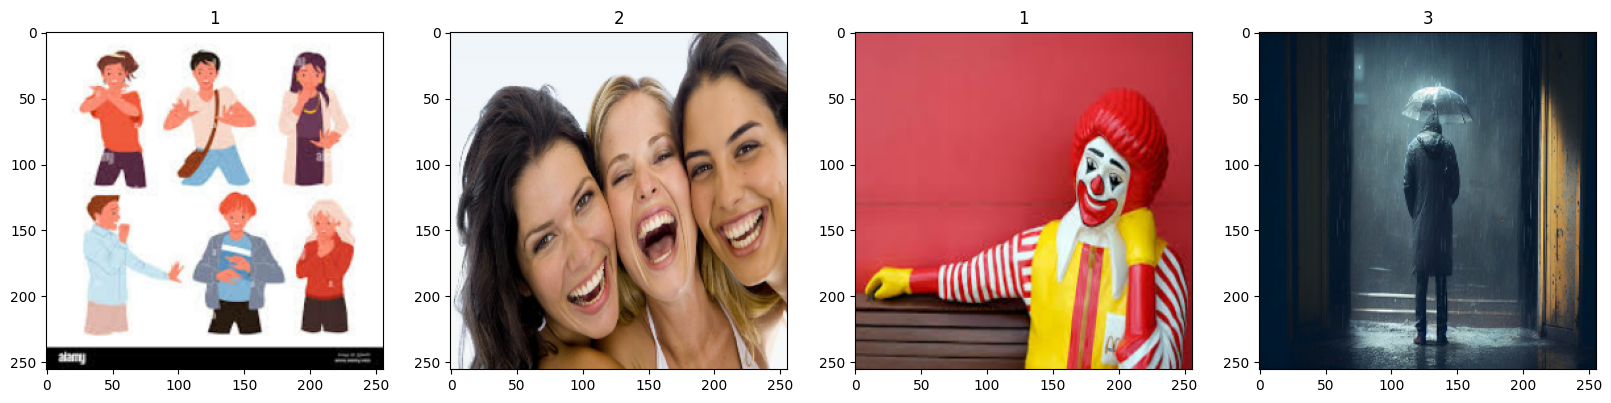

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255,y))

In [20]:
data.as_numpy_iterator().next()[0].max()

1.0

In [29]:
len(data)

19

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [31]:
test_size

2

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(test)

2

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [104]:
model = Sequential()

In [105]:
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4))

In [106]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,060 (3.14 MB)

 Trainable params: 823,060 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
logdir = 'logs'

In [109]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [110]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.3816 - loss: 1.3248 - val_accuracy: 0.4609 - val_loss: 1.2554
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4092 - loss: 1.2850 - val_accuracy: 0.4688 - val_loss: 1.2408
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4818 - loss: 1.2139 - val_accuracy: 0.4922 - val_loss: 1.1665
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4918 - loss: 1.1255 - val_accuracy: 0.5547 - val_loss: 1.1136
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6200 - loss: 0.9390 - val_accuracy: 0.6094 - val_loss: 0.9611
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6554 - loss: 0.8629 - val_accuracy: 0.6953 - val_loss: 0.8229
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6986 - loss: 0.7630 - val_accuracy: 0.6875 - val_loss: 0.7270
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7129 - loss: 0.6471 - val_accuracy: 0.7188 - v

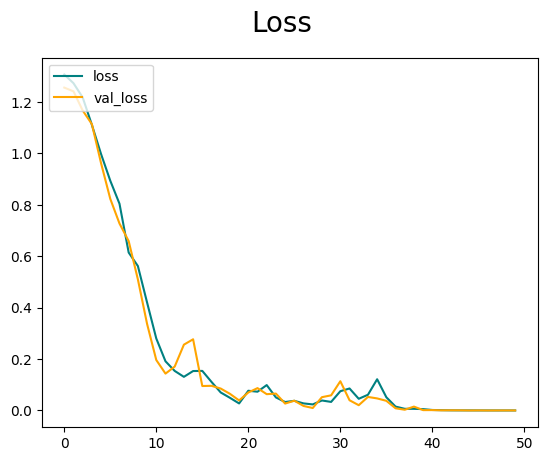

In [111]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = "orange", label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [127]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [128]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [129]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    yhat = tf.argmax(tf.nn.softmax(yhat), axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-07-24 19:38:14.013953: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [130]:
print(f'Precision {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision 1.0, Recall: 1.0, Accuracy:1.0


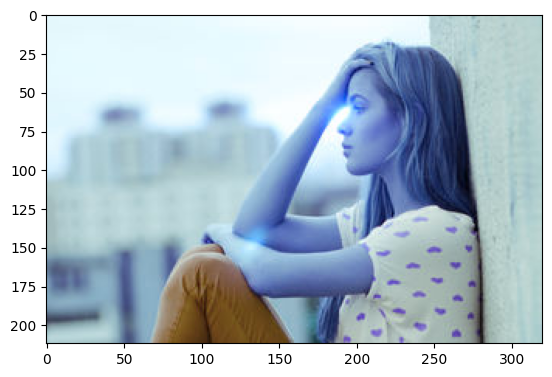

In [131]:
img = cv2.imread('shutterstock_114300748.jpg')
plt.imshow(img)
plt.show()

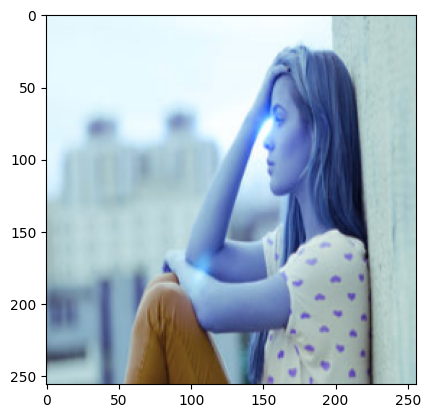

In [132]:
resize = tf.image.resize(img,(256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [137]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [138]:
yhat

array([[ 4.0785084, -1.7149124,  1.5278145, -6.863999 ]], dtype=float32)

In [139]:
yhat = tf.argmax(tf.nn.softmax(yhat), axis=1)
yhat

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>

In [142]:
from tensorflow.keras.models import load_model

In [140]:
model.save(os.path.join('models', 'emotions.keras'))

In [143]:
new_model = load_model(os.path.join('models', 'emotions.keras'))

In [144]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[ 4.0785084, -1.7149124,  1.5278145, -6.863999 ]], dtype=float32)